In [5]:
from numpy import *
import operator

def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group,labels

In [6]:
createDataSet()

(array([[ 1. ,  1.1],
        [ 1. ,  1. ],
        [ 0. ,  0. ],
        [ 0. ,  0.1]]), ['A', 'A', 'B', 'B'])

In [54]:
from numpy import *
import operator

def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group,labels

def classify0(inx,dataset,labels,k):
    datasetsize = dataset.shape[0]   #shape[0]表示矩阵的行数，shape[1]为列数
    diffmat = tile(inx,(datasetsize,1)) -  dataset     #tile有重复的功能，将inx 的行数重复为和datasetsize一样，然后将dataset减去是坐标相减
    sqdiffmat = diffmat**2
    sqdistances = sqdiffmat.sum(axis=1)  #axis=1求每行之和
    distances = sqdistances**0.5
    sorteddistindicies = distances.argsort()  #argsort是排序，将元素由小到大排序并返回元素的下标
    classcount = {}
    for i in range(k):
        voteilabel = labels[sorteddistindicies[i]]
        classcount[voteilabel] = classcount.get(voteilabel,0) + 1 #get是取字典里的元素，如果之前这个voteIlabel是有的，那么就返回字典里这个voteIlabel里的值，如果没有就返回0（后面写的），这行代码的意思就是算离目标点距离最近的k个点的类别，这个点是哪个类别哪个类别就加1  
    sortedclasscount = sorted(classcount.items(),key=operator.itemgetter(1),reverse=True)  #key=operator.itemgetter(1)的意思是按照字典里的第一个排序，{A:1,B:2},要按照第1个（AB是第0个），即‘1’‘2’排序。reverse=True是降序排序  
    return sortedclasscount[0][0]

In [27]:
group,labels = createDataSet()
classify0([0,1],group,labels,3)

'B'

In [12]:
#使用K-近邻算法改进约会网站的配对效果
import numpy as np
import os
import operator
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)
    returnMat = np.zeros((numberOfLines,3))
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] =  listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index +=1
    return returnMat,classLabelVector

In [13]:
datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')

In [14]:
datingDataMat

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

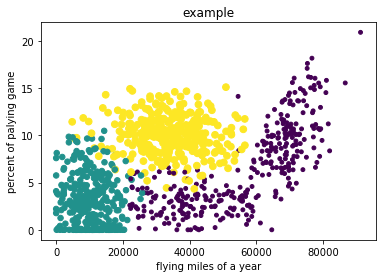

In [31]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,0],datingDataMat[:,1],15.0*np.array(datingLabels),15.0*np.array(datingLabels))
ax.set_title("example")
ax.set_xlabel('flying miles of a year')
ax.set_ylabel('percent of palying game')
plt.show()

In [45]:
from numpy import *
import operator
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals,(m,1))
    normDataSet =  normDataSet/tile(ranges,(m,1))
    return normDataSet,ranges,minVals

In [46]:
normMat,ranges,minVals = autoNorm(datingDataMat)

In [47]:
normMat

array([[ 0.44832535,  0.39805139,  0.56233353],
       [ 0.15873259,  0.34195467,  0.98724416],
       [ 0.28542943,  0.06892523,  0.47449629],
       ..., 
       [ 0.29115949,  0.50910294,  0.51079493],
       [ 0.52711097,  0.43665451,  0.4290048 ],
       [ 0.47940793,  0.3768091 ,  0.78571804]])

In [48]:
ranges

array([  9.12730000e+04,   2.09193490e+01,   1.69436100e+00])

In [49]:
minVals

array([ 0.      ,  0.      ,  0.001156])

In [57]:
from numpy import *
import operator

def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group,labels

def classify0(inx,dataset,labels,k):
    datasetsize = dataset.shape[0]   #shape[0]表示矩阵的行数，shape[1]为列数
    diffmat = tile(inx,(datasetsize,1)) -  dataset     #tile有重复的功能，将inx 的行数重复为和datasetsize一样，然后将dataset减去是坐标相减
    sqdiffmat = diffmat**2
    sqdistances = sqdiffmat.sum(axis=1)  #axis=1求每行之和
    distances = sqdistances**0.5
    sorteddistindicies = distances.argsort()  #argsort是排序，将元素由小到大排序并返回元素的下标
    classcount = {}
    for i in range(k):
        voteilabel = labels[sorteddistindicies[i]]
        classcount[voteilabel] = classcount.get(voteilabel,0) + 1 #get是取字典里的元素，如果之前这个voteIlabel是有的，那么就返回字典里这个voteIlabel里的值，如果没有就返回0（后面写的），这行代码的意思就是算离目标点距离最近的k个点的类别，这个点是哪个类别哪个类别就加1  
    sortedclasscount = sorted(classcount.items(),key=operator.itemgetter(1),reverse=True)  #key=operator.itemgetter(1)的意思是按照字典里的第一个排序，{A:1,B:2},要按照第1个（AB是第0个），即‘1’‘2’排序。reverse=True是降序排序  
    return sortedclasscount[0][0]
def datingClassTest():
    hoRatio = 0.10
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')
    normMat,ranges,minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print("the classifier came back with: %d, the real answer is: %d" %(classifierResult,datingLabels[i]))
        if (classifierResult !=datingLabels[i]):
            errorCount +=1.0
    print("the total error rate is: %f" %(errorCount/float(numTestVecs)))
            

In [58]:
 datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe